<a href="https://colab.research.google.com/github/Shreyash215/CodeSoft/blob/main/CodeSoft_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [6]:
train_path = "/content/train_data.txt"
train_data = pd.read_csv(train_path, sep=':::', names=['Title', 'Genre', 'Description'], engine='python')

In [7]:
print(train_data.describe())

                                 Title    Genre  \
count                             6311     6311   
unique                            6311       27   
top      Oscar et la dame rose (2009)    drama    
freq                                 1     1557   

                                              Description  
count                                                6311  
unique                                               6309  
top      Olga, Masha, and Irina Prozoroff lead lonely ...  
freq                                                    2  


In [8]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6311 entries, 1 to 6311
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        6311 non-null   object
 1   Genre        6311 non-null   object
 2   Description  6311 non-null   object
dtypes: object(3)
memory usage: 197.2+ KB
None


In [9]:
print(train_data.isnull().sum())

Title          0
Genre          0
Description    0
dtype: int64


In [10]:
test_path = "/content/test_data.txt"
test_data = pd.read_csv(test_path, sep=':::', names=['Id', 'Title', 'Description'], engine='python')
test_data.head()

,Id,Title,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


<ipython-input-11-85ec2650ce44>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, y='Genre', order=train_data['Genre'].value_counts().index, palette='viridis')
<ipython-input-11-85ec2650ce44>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts, palette='viridis')


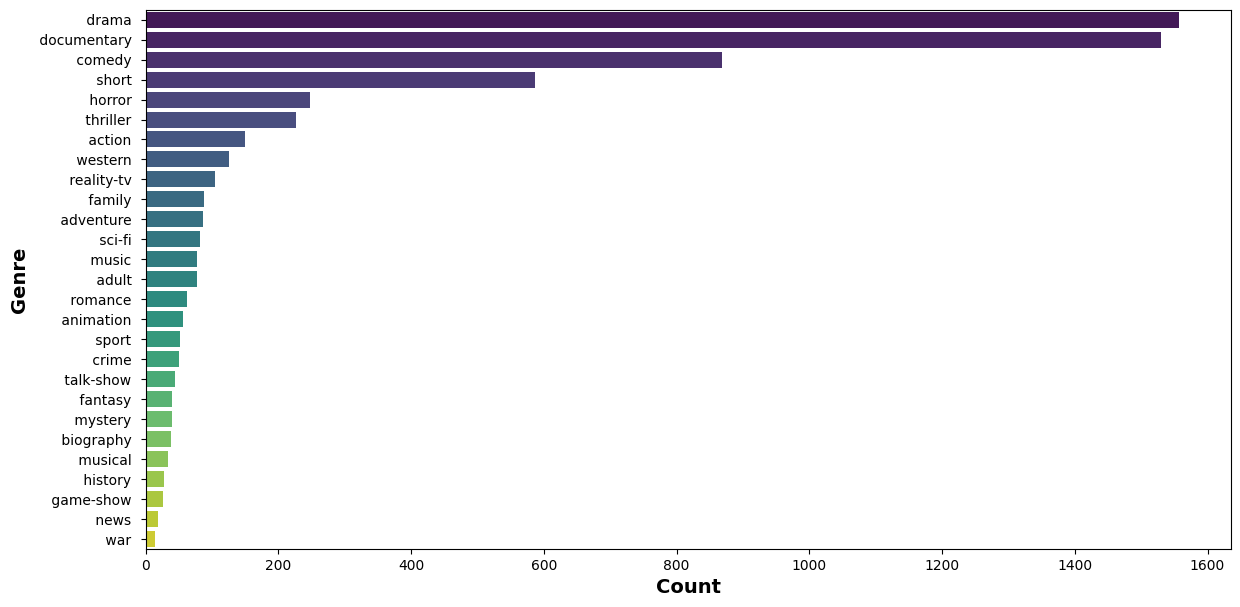

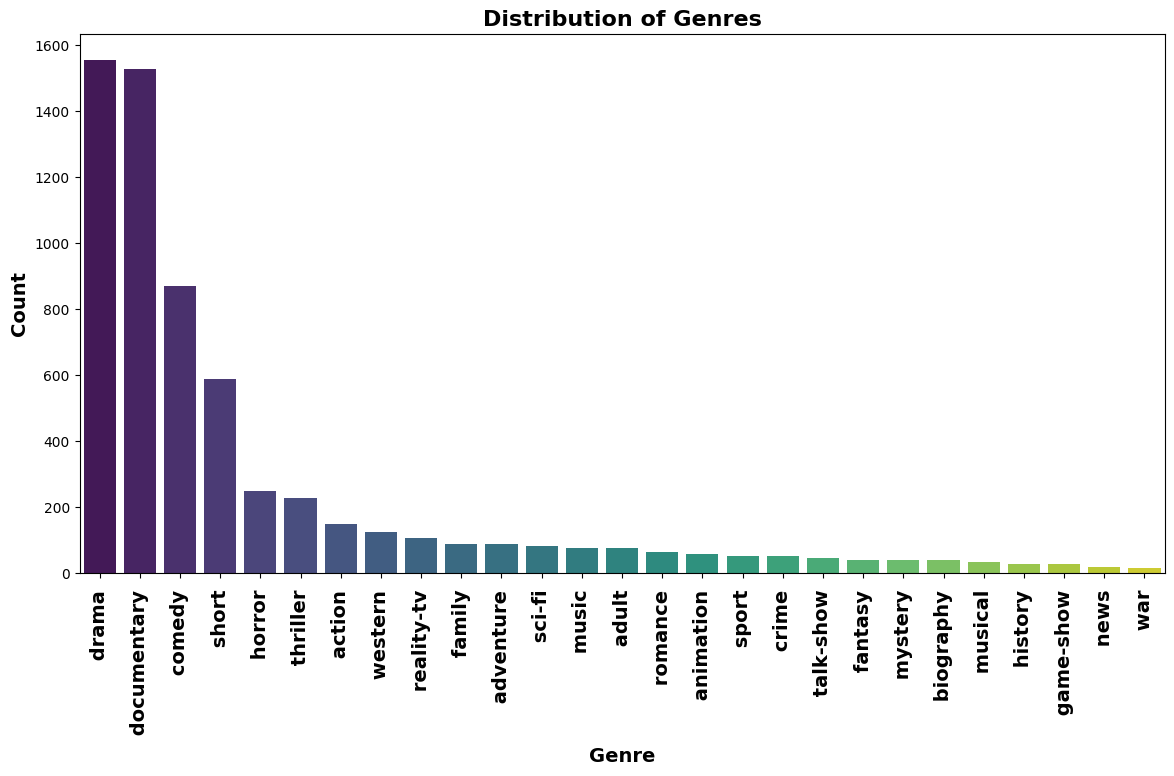

In [11]:
plt.figure(figsize=(14, 7))
sns.countplot(data=train_data, y='Genre', order=train_data['Genre'].value_counts().index, palette='viridis')
plt.xlabel('Count', fontsize=14, fontweight='bold')
plt.ylabel('Genre', fontsize=14, fontweight='bold')


plt.figure(figsize=(14, 7))
counts = train_data['Genre'].value_counts()
sns.barplot(x=counts.index, y=counts, palette='viridis')
plt.xlabel('Genre', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.title('Distribution of Genres', fontsize=16, fontweight='bold')
plt.xticks(rotation=90, fontsize=14, fontweight='bold')
plt.show()

In [13]:
!pip install nltk

In [14]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [22]:
import nltk.corpus
stopwords = nltk.corpus.stopwords.words('english')

In [23]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
stop_words = set(nltk.corpus.stopwords.words('english'))

In [27]:


def clean_text(text):
    text = text.lower()
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'pic.\S+', '', text)
    text = re.sub(r"[^a-zA-Z+']", ' ', text)
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text + ' ')
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words('english')
    text = " ".join([i for i in words if i not in stopwords and len(i) > 2])
    text = re.sub("\s[\s]+", " ", text).strip()
    return text

In [29]:
!pip install nltk

In [30]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [31]:
train_data['Text_cleaning'] = train_data['Description'].apply(clean_text)
test_data['Text_cleaning'] = test_data['Description'].apply(clean_text)

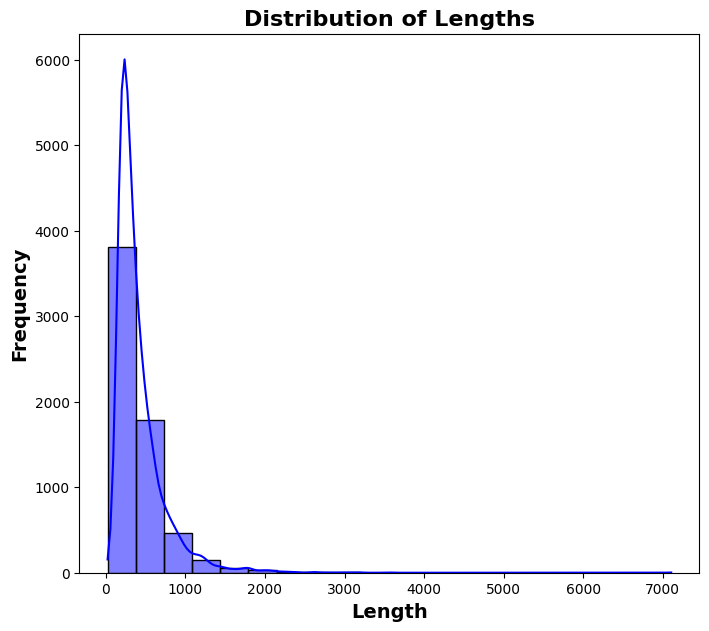

In [32]:

train_data['length_Text_cleaning'] = train_data['Text_cleaning'].apply(len)

plt.figure(figsize=(8, 7))
sns.histplot(data=train_data, x='length_Text_cleaning', bins=20, kde=True, color='blue')
plt.xlabel('Length', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.title('Distribution of Lengths', fontsize=16, fontweight='bold')
plt.show()

In [33]:

tfidf_vectorizer = TfidfVectorizer()


X_train = tfidf_vectorizer.fit_transform(train_data['Text_cleaning'])


X_test = tfidf_vectorizer.transform(test_data['Text_cleaning'])

In [34]:
X = X_train
y = train_data['Genre']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


classifier = MultinomialNB()
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_val)


accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)
print(classification_report(y_val, y_pred))

Validation Accuracy: 0.447347585114806
               precision    recall  f1-score   support

      action        0.00      0.00      0.00        28
       adult        0.00      0.00      0.00        17
   adventure        0.00      0.00      0.00        15
   animation        0.00      0.00      0.00         9
   biography        0.00      0.00      0.00         5
      comedy        0.33      0.01      0.01       186
       crime        0.00      0.00      0.00        11
 documentary        0.57      0.90      0.70       309
       drama        0.37      0.91      0.52       316
      family        0.00      0.00      0.00        18
     fantasy        0.00      0.00      0.00         6
   game-show        0.00      0.00      0.00         6
     history        0.00      0.00      0.00         7
      horror        0.00      0.00      0.00        48
       music        0.00      0.00      0.00        17
     musical        0.00      0.00      0.00         5
     mystery        0.00 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
X_test_predictions = classifier.predict(X_test)
test_data['Predicted_Genre'] = X_test_predictions

In [36]:
test_data.to_csv('predicted_genres.csv', index=False)

In [37]:

test_data.to_csv('/content/predicted_genres.csv', index=False)

print(test_data)

        Id                                         Title  \
0        1                         Edgar's Lunch (1998)    
1        2                     La guerra de papá (1977)    
2        3                  Off the Beaten Track (2010)    
3        4                       Meu Amigo Hindu (2015)    
4        5                            Er nu zhai (1955)    
...    ...                                           ...   
4904  4905   Composer Alive: Eastern Expressions (2007)    
4905  4906                 At Meydani Hippodrome (2011)    
4906  4907                       Taking the Hill (2006)    
4907  4908                      Dreaming for You (2009)    
4908  4909                           Rocket Rain (2013)    

                                            Description  \
0      L.R. Brane loves his life - his car, his apar...   
1      Spain, March 1964: Quico is a very naughty ch...   
2      One year in the life of Albin and his family ...   
3      His father has died, he hasn't spoke